---
title: "Optimizing the Flow of Traffic in Smart Cities through Network Analysis: A Comprehensive Strategy to Reduce Congestion and Enhance Urban Mobility"
author: "Yuang Huang, Idriss Moluh, Nolan Penoyer"
date: "2024-08-03"
format:
    html:
        embed-resources: true 
---

In [4]:
#from google.colab import files
#uploaded = files.upload()


In [5]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset'
data = pd.read_csv('Data/traffic.csv')

In [6]:

# Display the first few rows
print(data.head())

# Convert 'DateTime' to datetime
data['DateTime'] = pd.to_datetime(data['DateTime'])

# Handle missing values if any
data = data.dropna()


              DateTime  Junction  Vehicles           ID
0  2015-11-01 00:00:00         1        15  20151101001
1  2015-11-01 01:00:00         1        13  20151101011
2  2015-11-01 02:00:00         1        10  20151101021
3  2015-11-01 03:00:00         1         7  20151101031
4  2015-11-01 04:00:00         1         9  20151101041


Centrality: {1: 1.0, 2: 1.3333333333333333, 3: 1.3333333333333333, 4: 1.0}
Betweenness: {1: 0.0, 2: 0.6666666666666666, 3: 0.6666666666666666, 4: 0.0}


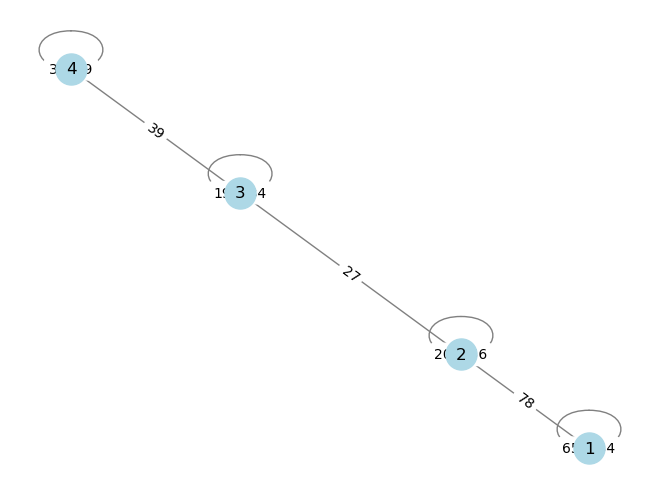

In [7]:
# Create a graph
G = nx.Graph()

# Assuming 'Junction' as node and 'Vehicles' as weight of edges
for i in range(len(data) - 1):
    current_junction = data.iloc[i]['Junction']
    next_junction = data.iloc[i + 1]['Junction']
    weight = data.iloc[i]['Vehicles']

    if not G.has_node(current_junction):
        G.add_node(current_junction)
    if not G.has_node(next_junction):
        G.add_node(next_junction)
    if G.has_edge(current_junction, next_junction):
        G[current_junction][next_junction]['weight'] += weight
    else:
        G.add_edge(current_junction, next_junction, weight=weight)

# Compute and print network metrics
centrality = nx.degree_centrality(G)
betweenness = nx.betweenness_centrality(G)
print("Centrality:", centrality)
print("Betweenness:", betweenness)

# Visualization
pos = nx.spring_layout(G)  # Using spring layout for visualization
weights = nx.get_edge_attributes(G, 'weight')
nx.draw(G, pos, with_labels=True, node_size=500, node_color='lightblue', edge_color='gray')
nx.draw_networkx_edge_labels(G, pos, edge_labels=weights)
plt.show()


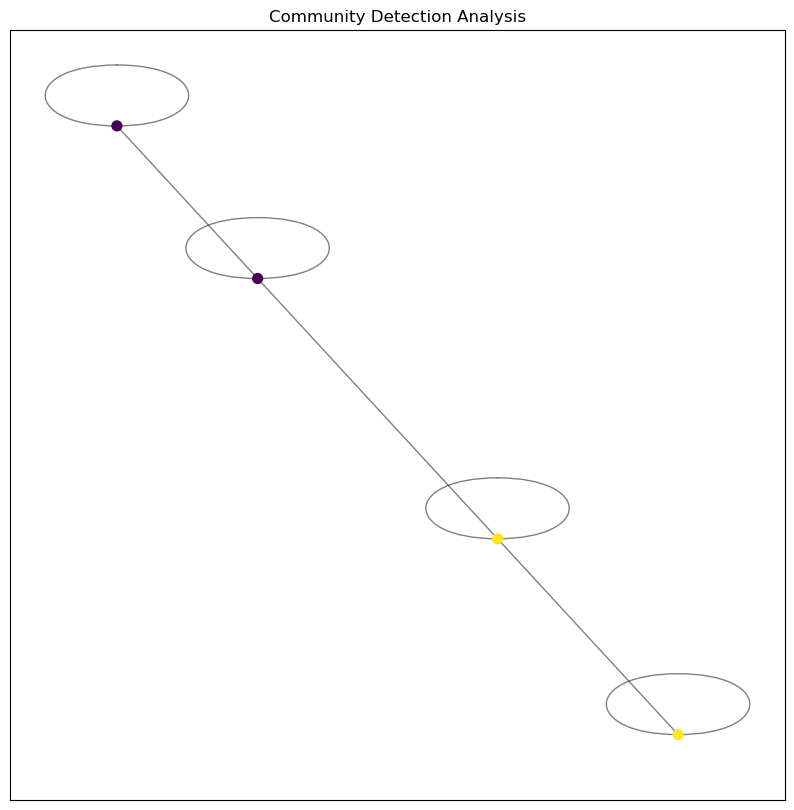

In [8]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import community

# Assuming 'G' is the network graph created earlier
communities = community.greedy_modularity_communities(G)
node_color = []
for node in G:
    for i, com in enumerate(communities):
        if node in com:
            node_color.append(i)

plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_color=node_color, cmap=plt.cm.viridis, node_size=50)
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.title('Community Detection Analysis')
plt.show()


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Extract features and target
data['Hour'] = data['DateTime'].dt.hour
data['DayOfWeek'] = data['DateTime'].dt.dayofweek

features = data[['Hour', 'DayOfWeek']]
target = data['Vehicles']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Train a model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)


Mean Squared Error: 388.7726624644184


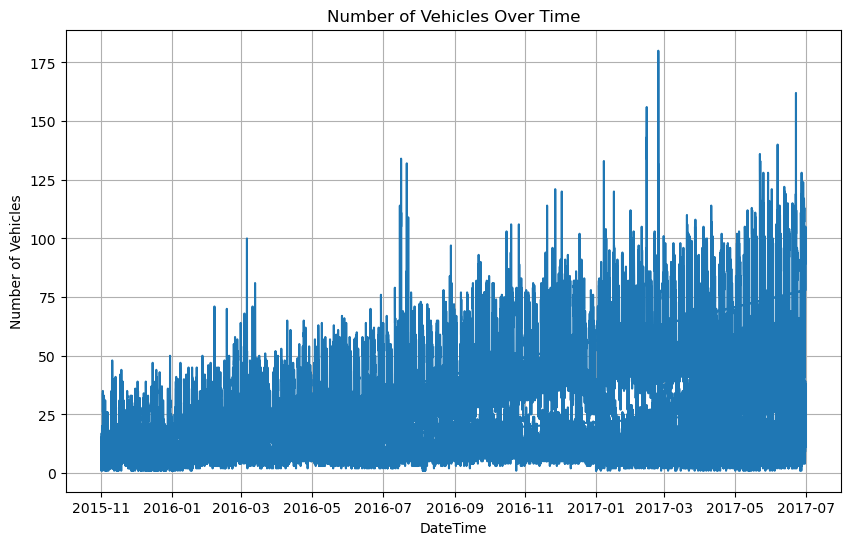

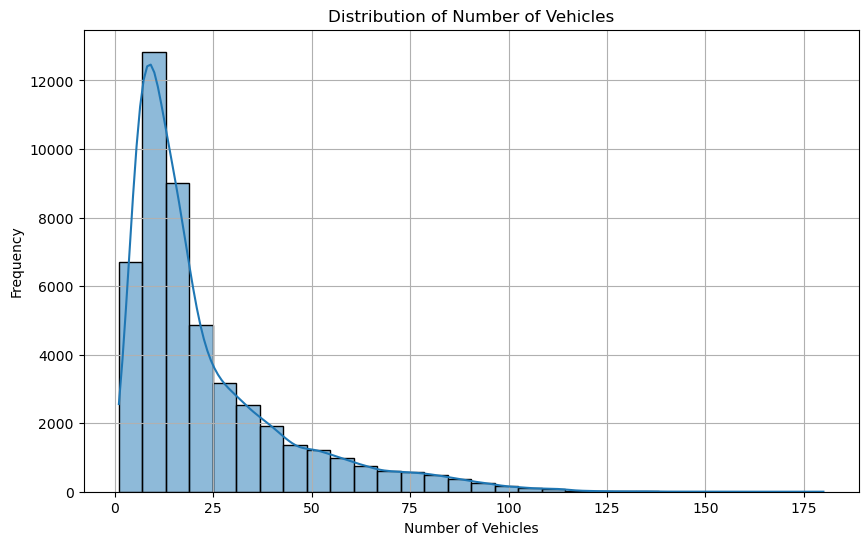

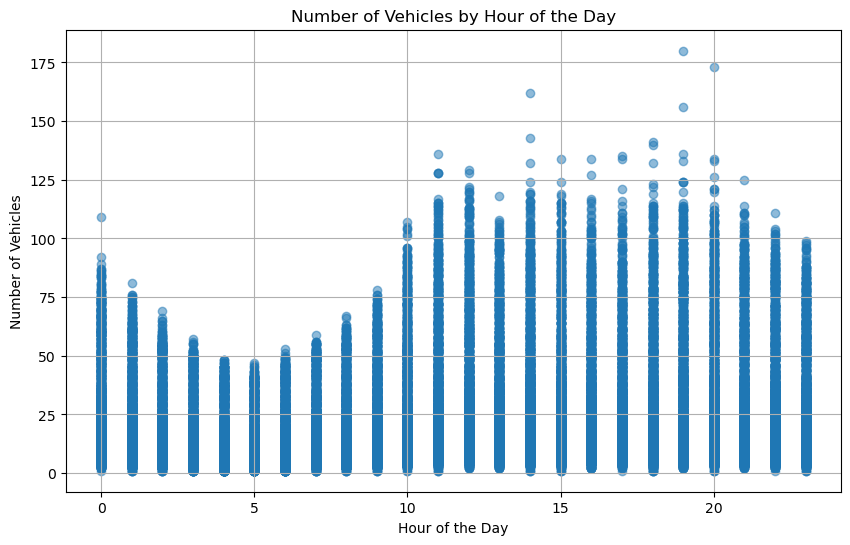

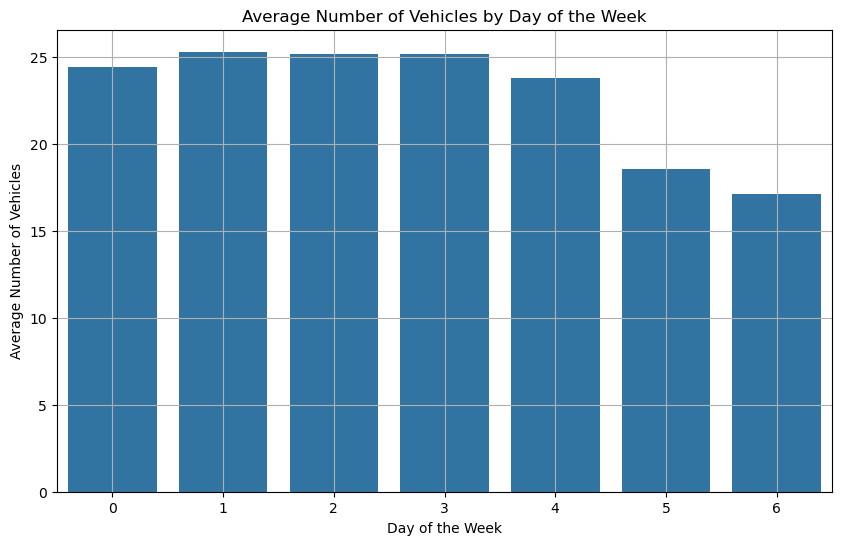

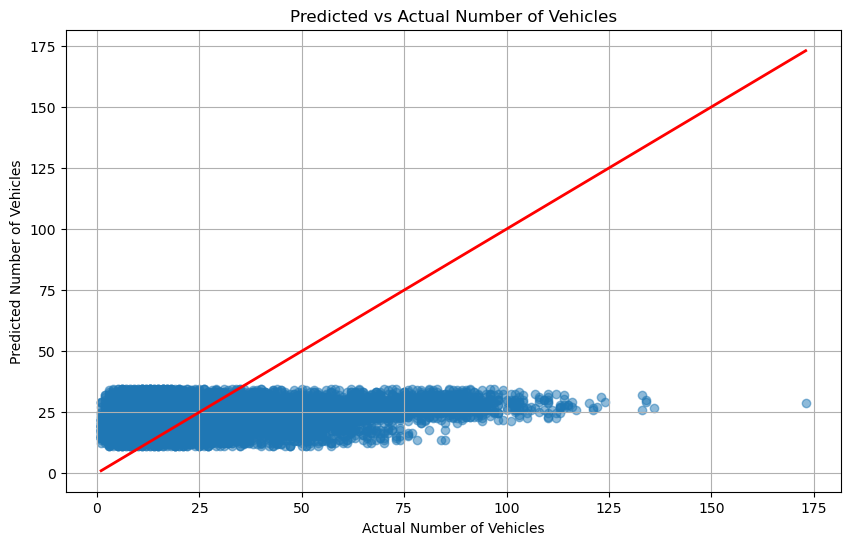

In [10]:

# Time Series Plot
plt.figure(figsize=(10, 6))
plt.plot(data['DateTime'], data['Vehicles'])
plt.title('Number of Vehicles Over Time')
plt.xlabel('DateTime')
plt.ylabel('Number of Vehicles')
plt.grid(True)
plt.show()

# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(data['Vehicles'], bins=30, kde=True)
plt.title('Distribution of Number of Vehicles')
plt.xlabel('Number of Vehicles')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(data['Hour'], data['Vehicles'], alpha=0.5)
plt.title('Number of Vehicles by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Vehicles')
plt.grid(True)
plt.show()

# Bar Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='DayOfWeek', y='Vehicles', data=data, errorbar=None)
plt.title('Average Number of Vehicles by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Number of Vehicles')
plt.grid(True)
plt.show()

# Prediction vs Actual Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, alpha=0.5)
plt.title('Predicted vs Actual Number of Vehicles')
plt.xlabel('Actual Number of Vehicles')
plt.ylabel('Predicted Number of Vehicles')
plt.grid(True)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)  # Line of perfect prediction
plt.show()


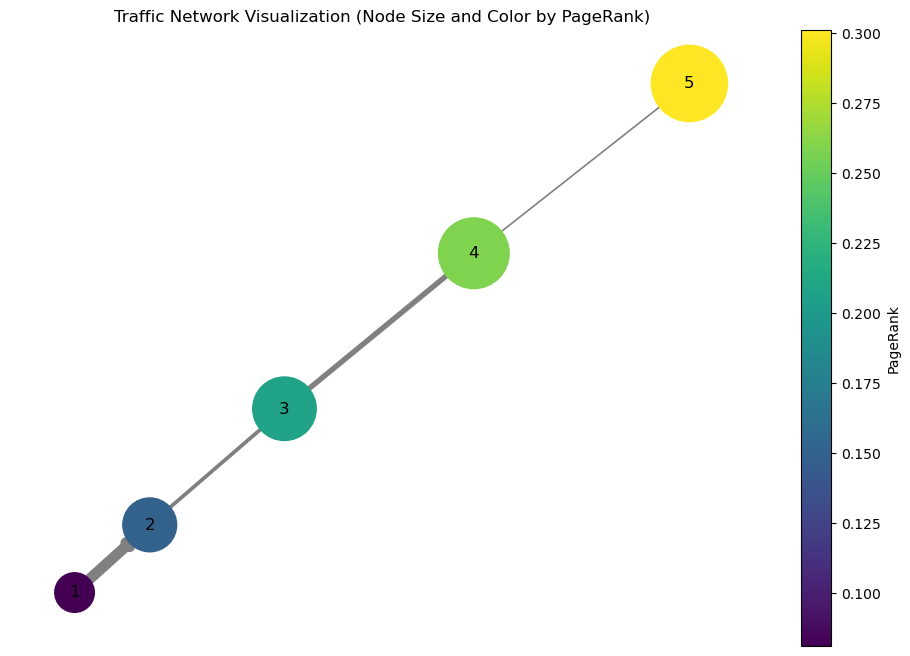

In [12]:
file_path = 'data/traffic.csv'
df = pd.read_csv(file_path)

# Construct the graph
G = nx.DiGraph()
for index, row in df.iterrows():
    G.add_edge(row['Junction'], row['Junction'] + 1, weight=row['Vehicles'])

# Compute PageRank
pagerank = nx.pagerank(G, weight='weight')

# Set node positions
pos = nx.spring_layout(G, seed=42)

# Draw nodes
plt.figure(figsize=(12, 8))
nodes = nx.draw_networkx_nodes(G, pos, node_size=[v * 10000 for v in pagerank.values()],
                               node_color=list(pagerank.values()), cmap=plt.cm.viridis)
# Draw edges
edges = nx.draw_networkx_edges(G, pos, edgelist=G.edges(), edge_color='gray',
                               width=[d['weight']*0.1 for (u, v, d) in G.edges(data=True)])
# Draw labels
nx.draw_networkx_labels(G, pos, labels={node: node for node in G.nodes()})

# Set title and colorbar
plt.title('Traffic Network Visualization (Node Size and Color by PageRank)')
plt.colorbar(nodes, label='PageRank')
plt.axis('off')
plt.show()
